<a href="https://colab.research.google.com/github/sirisha-kumari/Data-Mining-project/blob/main/Predicting_Multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Reading CSV

In [ ]:
df_original=pd.read_csv(r"/content/drive/MyDrive/Original_data_with_more_rows.csv.zip")
df_original

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...,...
30636,995,male,group C,some high school,standard,none,56,47,51
30637,996,male,group E,associate's degree,free/reduced,none,74,75,72
30638,997,male,group C,some college,standard,none,36,29,27
30639,998,male,group A,some high school,free/reduced,completed,43,34,39


In [ ]:
df_original.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75


In [ ]:
df_original.shape

(30641, 9)

# Exploratory Data Analysis







In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    30641 non-null  int64 
 1   Gender        30641 non-null  object
 2   EthnicGroup   30641 non-null  object
 3   ParentEduc    30641 non-null  object
 4   LunchType     30641 non-null  object
 5   TestPrep      30641 non-null  object
 6   MathScore     30641 non-null  int64 
 7   ReadingScore  30641 non-null  int64 
 8   WritingScore  30641 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 2.1+ MB


In [ ]:
df_original.describe()

,Unnamed: 0,MathScore,ReadingScore,WritingScore
count,30641.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,66.749355,69.624980,68.468327
std,288.747894,15.206049,14.671572,15.307814
min,0.000000,0.000000,10.000000,5.000000
25%,249.000000,56.000000,60.000000,58.000000
50%,500.000000,67.000000,70.000000,69.000000
75%,750.000000,78.000000,80.000000,79.000000
max,999.000000,100.000000,100.000000,100.000000


### Removing Unwanted Columns

In [ ]:
df_original.drop(['Unnamed: 0'],axis=1,inplace=True)

### Checking NA values

In [ ]:
df_original.isnull().sum()

Gender          0
EthnicGroup     0
ParentEduc      0
LunchType       0
TestPrep        0
MathScore       0
ReadingScore    0
WritingScore    0
dtype: int64

### Unique()

In [ ]:
df_original.nunique()

Gender           2
EthnicGroup      5
ParentEduc       6
LunchType        2
TestPrep         2
MathScore       94
ReadingScore    88
WritingScore    92
dtype: int64

### Mapping Numeric Values

In [ ]:
df_original.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'MathScore', 'ReadingScore', 'WritingScore'],
      dtype='object')

In [ ]:
df_original['Gender Label'] = df_original['Gender'].map({'female':0 , 'male':1})
df_original['Ethnic Label'] = df_original['EthnicGroup'].map({'group A': 0, 'group B':1, 'group C':2, 'group D':3, 'group E':4})
df_original['ParEdu Label'] = df_original['ParentEduc'].map({"bachelor's degree":0, 'some college':1, "master's degree":2,
       "associate's degree":3, 'high school':4, 'some high school':5})
df_original['Lunch Label']  = df_original['LunchType'].map({'standard':0, 'free/reduced':1})
df_original['Test Label']  = df_original['TestPrep'].map({'none':0, 'completed':1})

In [ ]:
df_original.drop(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep'], axis = 1, inplace = True)

In [ ]:
df_original.head()

,MathScore,ReadingScore,WritingScore,Gender Label,Ethnic Label,ParEdu Label,Lunch Label,Test Label
0,72,72,74,0,1,0,0,0
1,69,90,88,0,2,1,0,1
2,90,95,93,0,1,2,0,0
3,47,57,44,1,0,3,1,0
4,76,78,75,1,2,1,0,0


# Create Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### 1. Writing Score

In [ ]:
#Using Mathscore and ReadingScore
X = df_original.drop([ 'WritingScore'], axis = 1)
y = df_original['WritingScore']
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= .33)
model = LinearRegression()
model.fit(X_train, y_train)
writing_score_1 = model.score(X_test, y_test)

In [ ]:
#without using MathScore and ReadingScore
X = df_original.drop(['MathScore', 'ReadingScore', 'WritingScore'], axis = 1)
y = df_original['WritingScore']
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= .33)
model = LinearRegression()
model.fit(X_train, y_train)
writing_score_2 = model.score(X_test, y_test)

### Reading Score

In [ ]:
#using Mathscore and writing Score
X = df_original.drop(['ReadingScore'], axis = 1)
y = df_original['ReadingScore']
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= .33)
model = LinearRegression()
model.fit(X_train, y_train)
read_score_1 = model.score(X_test, y_test)

In [ ]:
#without using mathscore and writing score
X = df_original.drop(['MathScore', 'ReadingScore', 'WritingScore'], axis = 1)
y = df_original['ReadingScore']
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= .33)
model = LinearRegression()
model.fit(X_train, y_train)
read_score_2 = model.score(X_test, y_test)


### MathScore

In [ ]:
#using reading score and writing score
X = df_original.drop(['MathScore'], axis = 1)
y = df_original['MathScore']
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= .33)
model = LinearRegression()
model.fit(X_train, y_train)
math_score_1 = model.score(X_test, y_test)

In [ ]:
#without using reading score and writing score
X = df_original.drop(['MathScore', 'ReadingScore', 'WritingScore'], axis = 1)
y = df_original['MathScore']
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= .33)
model = LinearRegression()
model.fit(X_train, y_train)
math_score_2 = model.score(X_test, y_test)

## Score_df

In [ ]:
score = {
    'Score': ['Writing Score', 'Reading Score', 'Math Score'],
    'Using_other_Scores' : [writing_score_1,read_score_1,math_score_1],
    'Without_other_Scores'   : [writing_score_2, read_score_2, math_score_2]
        }

score_df= pd.DataFrame(score)
score_df

,Score,Using_other_Scores,Without_other_Scores
0,Writing Score,0.941431,0.311170
1,Reading Score,0.923685,0.211502
2,Math Score,0.865018,0.267121


## Visualization of Score_df

In [ ]:
Score= ('Writing Score', 'Reading Score', 'Math Score')
score = {
    'Using_other_Scores' : [round(writing_score_1,2),round(read_score_1,2),round(math_score_1,2)],
    'Without_other_Scores'   : [round(writing_score_2,2), round(read_score_2,2), round(math_score_2,2)]
        }

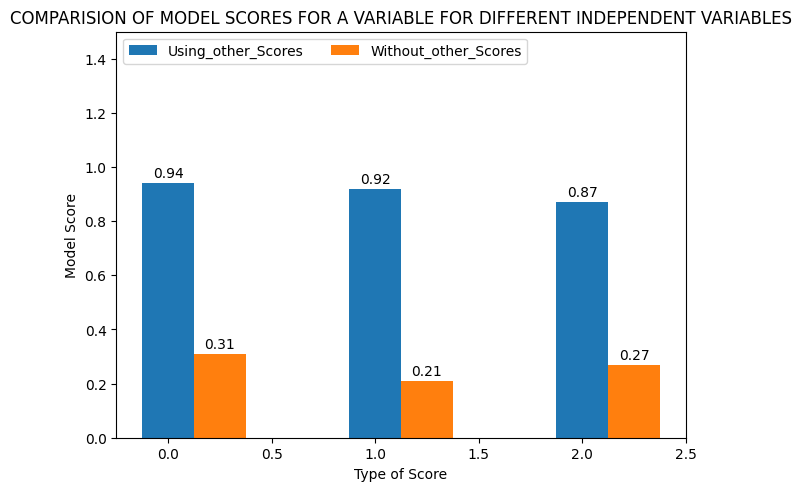

In [ ]:
x = np.arange(len(Score))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in score.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=2)
    multiplier += 1

ax.set_xlabel('Type of Score')
ax.set_ylabel('Model Score')
ax.set_title('COMPARISION OF MODEL SCORES FOR A VARIABLE FOR DIFFERENT INDEPENDENT VARIABLES')
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.5)

plt.show()

## Multivariate Linear Regression

In [ ]:
X = df_original.drop(['MathScore', 'ReadingScore', 'WritingScore'], axis = 1)
y = df_original[['MathScore', 'ReadingScore', 'WritingScore']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= .33)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.25979283120132884

In [ ]:
y_pred = model.predict(X_test)
y_pred[0]

array([65.23311417, 73.28264317, 72.70742642])